# Data Science Project: Planning Stage (Individual)

#### By: Emma Smith

![My Image](https://www.pluggedin.com/wp-content/uploads/2020/01/minecraft-review-image-1536x881.jpg)

----
### 1) **Data Description:**

**Overview:**

Data has been gathered from a MineCraft server called PlaiCraft. Data is gathered during players' actions as they navigate through the world. The one data set I will use is 'players.csv' and it's for data more personalized to the player (e.g gender, age). These values are gathered right before (Name, Age, Etc) you join, and also gathered during (Played Hours) playtime. 

**Players.csv:**

| Variable Name | Type | Description | Amount |
|:-------------:|:----:|:-----------:|:------:|
|Experience | Categorical | Players experience level | 196
|Subscribe| Logical |Indicates if the player is subscriber to newsletter | FALSE:52 \  TRUE:144 
|Hashed Email | Identifier | Hashed version of the players email for anonymization | 196
|Played Hours | Numeric | Total hours the player has played | 196
|Name | Identifier  | Name of each Player | 196 |
|Gender | Categorical | Gender of each Player | 196 |
|Age | Numeric | Age of each Player | 196 |

**Possible Issues:**

The possible issues with the data would be missing or biased data. We do not want missing values because that would make our data unreliable and not supportive, for example I see a couple NA values in some columns that are important like age. Another issue can be biases in the data, if it's not standardized it will make it harder to predict. 


### 2) **Questions:**

**Broad Question**
"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

**Specific Question**
"Can gender and experience level predict subscription in the game-related newsletters for PlaiCraft?"

My question is addressing the question by taking one game-related behavior (experience) and one player characteristic (gender) to compare them on their odds of subscribing. This allows developers to know when to push ads for certain experience levels and also know their demographic for ad persuasion techniques. 


**When wrangling:** 

Firstly, I will make sure I have no NA values. Then I'll isolate rows that I will be using (Gender, Experience, Subscription) by using `group_by`. Secondly I will summarise using `summarise()` while adding `count = n()`, making it easier to read. Thirdly, I'll create a facetgrid bar plot with different graphs indicating experience levels, and have the bars be gendered and colored depending on subscription.
Finally, I'll apply a logistic regression model. 


### 3)  **Exploratory Data Analysis**

In [109]:
library(tidyverse)
library(repr)

In [110]:
player_data <- read_csv("https://raw.githubusercontent.com/EmmaSS84/Proposal_Project/refs/heads/main/players.csv")
session_data <- read_csv("https://raw.githubusercontent.com/EmmaSS84/Proposal_Project/refs/heads/main/sessions.csv")
head(session_data, 5)
head(player_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


In [111]:
player_means <- player_data |>
  summarise(across(where(is.numeric),\(x)(mean(x, na.rm = TRUE))))
player_means

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


gender,experience,subscribe,count
<chr>,<chr>,<lgl>,<int>
Agender,Veteran,TRUE,2
Female,Amateur,FALSE,3
Female,Amateur,TRUE,11
Female,Beginner,FALSE,4
Female,Beginner,TRUE,10


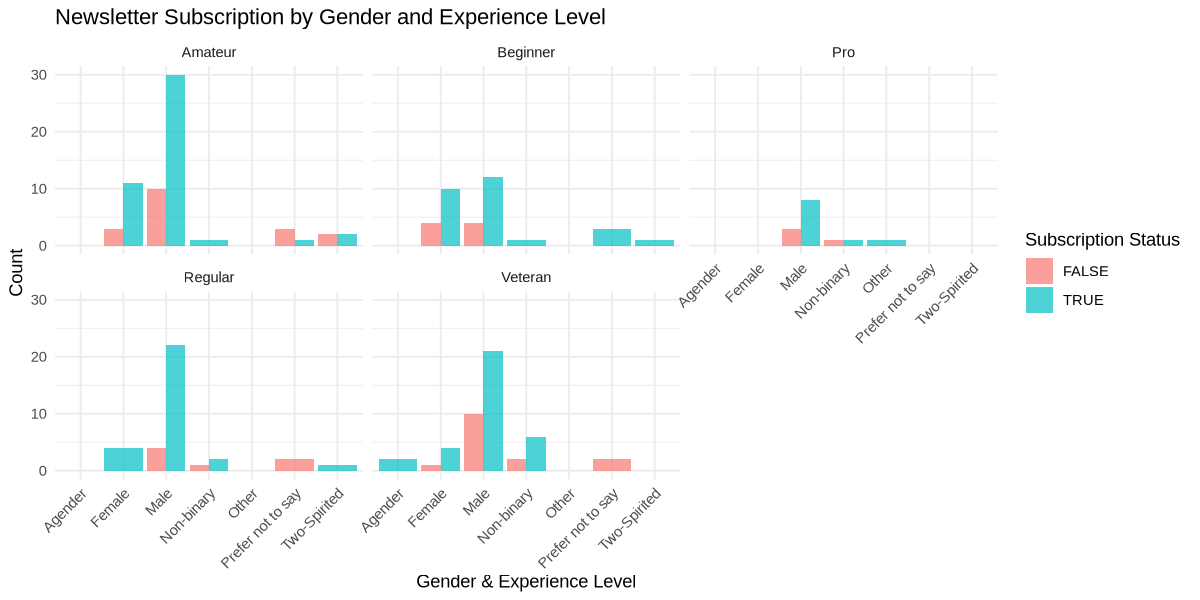

In [112]:
player_data_wrangled <- player_data |> 
  group_by(gender, experience, subscribe) |> 
  summarise(count = n(), .groups = 'drop')  
  
head(player_data_wrangled, 5)

ggplot(player_data_wrangled, aes(x = gender, y = count, fill = subscribe)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
  facet_wrap(~ experience) +  
  labs(title = "Newsletter Subscription by Gender and Experience Level",
       x = "Gender & Experience Level",
       y = "Count",
       fill = "Subscription Status") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


My graph shows that this game is obviously male dominated and has a lot more subscribers than nonsubscribers! It also shows that most of the demographic is in the "Amateur" level and it also shows one of the highest subscriber areas. 

### 4) **Methods and Plan**

**Proposed Method: Logistic Regression**


Based on further research I came to the conclusion that Logistic Regression is better than KNN for this graph and values. Our predictor is a TRUE/FALSE "binary" variable so logistic regression handles these predictors way better than KNN. I assume no multicollinearity, independent observations, and a linear relationship between predictors and log-odds. Limitations include sensitivity to outliers and difficulty modeling non-linear, so if my relation is non linear this will be a problem. The data will split 80/20 for training and testing allowing for accuracy, precision and recall. Missing data will be removed, and stratified sampling will ensure balance splits. Finally k-fold cross-validation will validate the model performance and prevent overfitting. Now we should have a model ready for predictions!


------